<a href="https://colab.research.google.com/github/Ahmetyldrr/HuggingFaceForNLP/blob/main/Basic_Sentiment_Analysis_Duygu_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformatörlere Giriş

Kitap : https://learning.oreilly.com/course/natural-language-processing/9781836200673/

Kodlar : https://github.com/lazyprogrammer/machine_learning_examples

Bu kurs transformatörlere yeni başlayanlar için uygundur.

Bu kurs belkide transformatör konusunda girmek isteyen ama bu konuda istekli olanlar içindir.

Bu kurs transformatörlerin nasıl kullanılacağı ile ilgilidir.

Burada aslında tokenleştirme süreçlerini anlayacağız.

## Öğreneceklerimiz

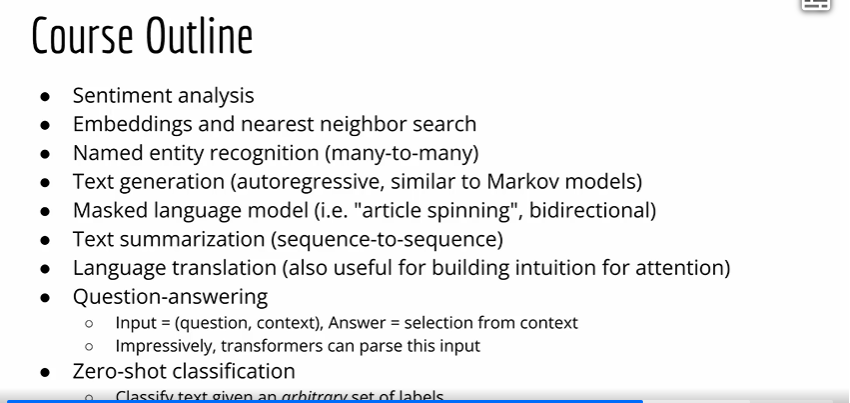

## Duygu Analizi

In [1]:
!pip install transformers

In [2]:
from transformers import pipeline

In [3]:
classifier = pipeline("sentiment-analysis")
classifier

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [4]:
classifier("this is so good movies")

[{'label': 'POSITIVE', 'score': 0.999863862991333}]

In [5]:
classifier("i like this product")

[{'label': 'POSITIVE', 'score': 0.9998130202293396}]

In [6]:
classifier("so bad product , i dont like")

[{'label': 'NEGATIVE', 'score': 0.9997655749320984}]

In [7]:
classifier("no comment")

[{'label': 'NEGATIVE', 'score': 0.9760733842849731}]

## Python ile Duygu Analizi

In [8]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2025-03-27 11:50:33--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  2.30MB/s    in 1.4s    

2025-03-27 11:50:36 (2.30 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [9]:
from transformers import pipeline
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import *

In [10]:
classifier = pipeline("sentiment-analysis")
classifier

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [11]:
type(classifier)

transformers.pipelines.text_classification.TextClassificationPipeline

In [12]:
import torch

In [13]:
torch.cuda.is_available()

True

In [14]:
torch.cuda.current_device()

0

In [15]:
df_ = pd.read_csv("/content/AirlineTweets.csv")
df_

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [16]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [21]:
df = df_[["airline_sentiment","text"]]

In [22]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


<Axes: >

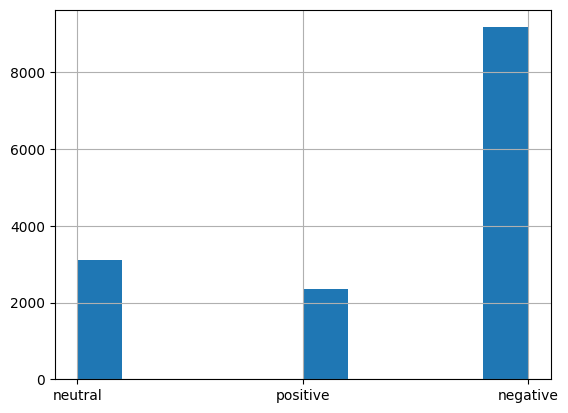

In [19]:
df["airline_sentiment"].hist()

In [23]:
df = df[df["airline_sentiment"] != "neutral"]
df

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...
14634,negative,@AmericanAir right on cue with the delays👌
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


In [26]:
target_map = {'positive':0,'negative':1}
df["target"] = df["airline_sentiment"].map(target_map)
df

<ipython-input-26-6ca75fd1dcd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df["airline_sentiment"].map(target_map)


,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,0
3,negative,@VirginAmerica it's really aggressive to blast...,1
4,negative,@VirginAmerica and it's a really big bad thing...,1
5,negative,@VirginAmerica seriously would pay $30 a fligh...,1
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",0
...,...,...,...
14633,negative,@AmericanAir my flight was Cancelled Flightled...,1
14634,negative,@AmericanAir right on cue with the delays👌,1
14635,positive,@AmericanAir thank you we got on a different f...,0
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...,1


In [27]:
len(df)

11541

In [46]:
texts = df["text"].tolist()
texts[:5]

["@VirginAmerica plus you've added commercials to the experience... tacky.",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)']

In [47]:
predictions = classifier(texts)
predictions[:5]

[{'label': 'POSITIVE', 'score': 0.6070827841758728},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388}]

In [48]:
probs = [d["score"] if d["label"].startswith("P") else 1-d["score"] for d in predictions]
probs[:5]

[0.6070827841758728,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574944972991943,
 0.9553212523460388]

In [31]:
len(probs)

11541

In [39]:
preds =  [0 if d["label"].startswith("P") else 1 for d in predictions]

In [40]:
len(preds)

11541

In [41]:
preds = np.array(preds)


In [42]:
print("acc" , np.mean(df["target"]==preds))

acc 0.8898708950697514


In [44]:
cm = confusion_matrix(df["target"],preds,normalize='true')
cm

array([[0.84595853, 0.15404147],
       [0.09882327, 0.90117673]])

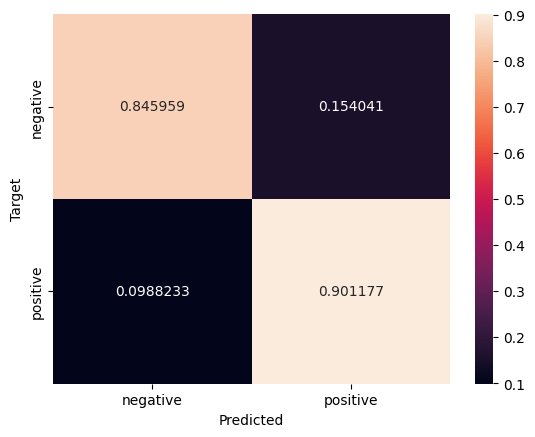

In [45]:
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [49]:
f1_score(df["target"],preds)

0.928647616908999

In [50]:
roc_auc_score(df["target"],preds)

np.float64(0.8735676271257871)